In [1]:
import numpy as np
import pandas as pd

In [2]:
#variables

num_clusters = 6

In [3]:
df = pd.read_csv('feb-2019-survey-final-2.csv')

In [4]:
df.head()

,Timestamp,Email Address,College Name?,Current Branch?,Current Year?,What is your Grade in College (GPA)?,How would you rate your puzzle solving efficiency?,Have you prepared for any olympiads/national level competitive examinations in your school days?,Have you actively participated in activities like chess or abacus etc?,"Have you been ""extensively"" involved in the following? [Competitive Coding]",...,How well do you think your GPA justifies the amount of efforts you put in?,"If you had an idea for a technical project, would you:","If you had an exam tomorrow, of a subject not of your interest, would you study hard to maintain a good score?",Are you proficient in the following? [Object Oriented Programming Concepts],Are you proficient in the following? [C/C++],Are you proficient in the following? [JAVA],Are you proficient in the following? [Python],Provide your preference for the following methods of learning [Books/Textual info on the Internet],Provide your preference for the following methods of learning [Online courses/videos],Provide your preference for the following methods of learning [Personalised classroom teaching (human)]
0,2/14/2019 13:39:07,admin,Pune Institute of Computer Technology,Computer Engineering,Fourth Year,9.99,Average,Not Participated,No,No,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,No/Average performance,No,No,No,No,Do not prefer,Do not prefer,Do not prefer
1,2/14/2019 13:39:07,abizerL123@gmail.com,Pune Institute of Computer Technology,Computer Engineering,Fourth Year,9.40,High,Not Participated,No,Yes,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,Yes,No,No,Prefer,Prefer,Prefer
2,2/14/2019 13:42:31,saurabhkshirsagar35@gmail.com,Pune Institute of Computer Technology,Computer Engineering,Fourth Year,9.37,Average,Participated and Prepared,No,No,...,is Apt or Overestimates my efforts,Start to learn and implement making the project,Yes,Yes,No,Yes,No,Do not prefer,Prefer,Prefer
3,2/14/2019 13:43:08,mahak.bansal97@gmail.com,Pune Institute of Computer Technology,Computer Engineering,Fourth Year,9.20,Average,Participated and Prepared,No,No,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,No,Yes,No,Prefer,Prefer,Prefer
4,2/14/2019 13:53:48,tjs.srivastava@gmail.com,Pune Institute of Computer Technology,Computer Engineering,Fourth Year,9.32,Average,Participated and Prepared,No,Yes,...,it Underestimates my efforts,Start to learn and implement making the project,Yes,Yes,Yes,No,Yes,Prefer,Prefer,Prefer


In [5]:
df.shape

(113, 41)

In [6]:
# An array of the column names
df.columns 

Index(['Timestamp', 'Email Address', 'College Name?', 'Current Branch?',
       'Current Year?', 'What is your Grade in College (GPA)?',
       'How would you rate your puzzle solving efficiency?',
       'Have you prepared for any olympiads/national level competitive examinations in your school days?',
       'Have you actively participated in activities like chess or abacus etc?',
       'Have you been "extensively" involved in the following? [Competitive Coding]',
       'Have you been "extensively" involved in the following? [Sodtware Development]',
       'Have you been "extensively" involved in the following? [ML/AI Projects or Research]',
       'Have you been "extensively" involved in the following? [Mathematics and Logical Reasoning]',
       'Have you been "extensively" involved in the following? [Social Activities (College Fest Organization or similar managerial or club activities)]',
       'Have you been "extensively" involved in the following? [Literature/Blogging ]',
   

In [7]:
# Columns and their types
df.dtypes

Timestamp                                                                                                                                           object
Email Address                                                                                                                                       object
College Name?                                                                                                                                       object
Current Branch?                                                                                                                                     object
Current Year?                                                                                                                                       object
What is your Grade in College (GPA)?                                                                                                               float64
How would you rate your puzzle solving efficiency?                    

In [8]:
# Converts the frame to a two-dimensional table
df.values 

array([['2/14/2019 13:39:07', 'admin',
        'Pune Institute of Computer Technology', ..., 'Do not prefer',
        'Do not prefer', 'Do not prefer'],
       ['2/14/2019 13:39:07', 'abizerL123@gmail.com',
        'Pune Institute of Computer Technology', ..., 'Prefer', 'Prefer',
        'Prefer'],
       ['2/14/2019 13:42:31', 'saurabhkshirsagar35@gmail.com',
        'Pune Institute of Computer Technology', ..., 'Do not prefer',
        'Prefer', 'Prefer'],
       ...,
       ['2/15/2019 16:17:00', 'utsavll0@gmail.com',
        'Pune Institute of Computer Technology', ..., 'Prefer', 'Prefer',
        'Prefer'],
       ['2/15/2019 16:39:23', 'shreedharkolhe0@gmail.com',
        'Pune Institute of Computer Technology', ..., 'Prefer', 'Prefer',
        'Do not prefer'],
       ['2/15/2019 16:48:10', 'pathakrajat27@gmail.com',
        'Pune Institute of Computer Technology', ..., 'Prefer', 'Prefer',
        'Do not prefer']], dtype=object)

In [9]:
# Displays descriptive stats for all columns
df.describe()

,What is your Grade in College (GPA)?
count,113.000000
mean,8.717699
std,0.628360
min,7.000000
25%,8.320000
50%,8.840000
75%,9.180000
max,9.990000


In [10]:
import matplotlib
import matplotlib.pyplot as plt

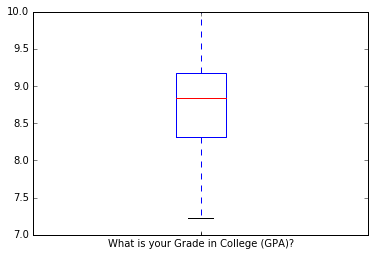

In [11]:
df.plot(kind='box')

In [12]:
#df = df.drop(['Timestamp','Email Address'], axis = 1)

In [13]:
df.head()

,Timestamp,Email Address,College Name?,Current Branch?,Current Year?,What is your Grade in College (GPA)?,How would you rate your puzzle solving efficiency?,Have you prepared for any olympiads/national level competitive examinations in your school days?,Have you actively participated in activities like chess or abacus etc?,"Have you been ""extensively"" involved in the following? [Competitive Coding]",...,How well do you think your GPA justifies the amount of efforts you put in?,"If you had an idea for a technical project, would you:","If you had an exam tomorrow, of a subject not of your interest, would you study hard to maintain a good score?",Are you proficient in the following? [Object Oriented Programming Concepts],Are you proficient in the following? [C/C++],Are you proficient in the following? [JAVA],Are you proficient in the following? [Python],Provide your preference for the following methods of learning [Books/Textual info on the Internet],Provide your preference for the following methods of learning [Online courses/videos],Provide your preference for the following methods of learning [Personalised classroom teaching (human)]
0,2/14/2019 13:39:07,admin,Pune Institute of Computer Technology,Computer Engineering,Fourth Year,9.99,Average,Not Participated,No,No,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,No/Average performance,No,No,No,No,Do not prefer,Do not prefer,Do not prefer
1,2/14/2019 13:39:07,abizerL123@gmail.com,Pune Institute of Computer Technology,Computer Engineering,Fourth Year,9.40,High,Not Participated,No,Yes,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,Yes,No,No,Prefer,Prefer,Prefer
2,2/14/2019 13:42:31,saurabhkshirsagar35@gmail.com,Pune Institute of Computer Technology,Computer Engineering,Fourth Year,9.37,Average,Participated and Prepared,No,No,...,is Apt or Overestimates my efforts,Start to learn and implement making the project,Yes,Yes,No,Yes,No,Do not prefer,Prefer,Prefer
3,2/14/2019 13:43:08,mahak.bansal97@gmail.com,Pune Institute of Computer Technology,Computer Engineering,Fourth Year,9.20,Average,Participated and Prepared,No,No,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,No,Yes,No,Prefer,Prefer,Prefer
4,2/14/2019 13:53:48,tjs.srivastava@gmail.com,Pune Institute of Computer Technology,Computer Engineering,Fourth Year,9.32,Average,Participated and Prepared,No,Yes,...,it Underestimates my efforts,Start to learn and implement making the project,Yes,Yes,Yes,No,Yes,Prefer,Prefer,Prefer


In [14]:
df = df.loc[df['College Name?'] == 'Pune Institute of Computer Technology']
dfemail = df.copy()

df = df.drop(['Timestamp','Email Address','Current Branch?', 'Current Year?'], axis = 1)

In [15]:
df.head()

,College Name?,What is your Grade in College (GPA)?,How would you rate your puzzle solving efficiency?,Have you prepared for any olympiads/national level competitive examinations in your school days?,Have you actively participated in activities like chess or abacus etc?,"Have you been ""extensively"" involved in the following? [Competitive Coding]","Have you been ""extensively"" involved in the following? [Sodtware Development]","Have you been ""extensively"" involved in the following? [ML/AI Projects or Research]","Have you been ""extensively"" involved in the following? [Mathematics and Logical Reasoning]","Have you been ""extensively"" involved in the following? [Social Activities (College Fest Organization or similar managerial or club activities)]",...,How well do you think your GPA justifies the amount of efforts you put in?,"If you had an idea for a technical project, would you:","If you had an exam tomorrow, of a subject not of your interest, would you study hard to maintain a good score?",Are you proficient in the following? [Object Oriented Programming Concepts],Are you proficient in the following? [C/C++],Are you proficient in the following? [JAVA],Are you proficient in the following? [Python],Provide your preference for the following methods of learning [Books/Textual info on the Internet],Provide your preference for the following methods of learning [Online courses/videos],Provide your preference for the following methods of learning [Personalised classroom teaching (human)]
0,Pune Institute of Computer Technology,9.99,Average,Not Participated,No,No,No,No,No,No,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,No/Average performance,No,No,No,No,Do not prefer,Do not prefer,Do not prefer
1,Pune Institute of Computer Technology,9.40,High,Not Participated,No,Yes,Yes,No,Yes,Yes,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,Yes,No,No,Prefer,Prefer,Prefer
2,Pune Institute of Computer Technology,9.37,Average,Participated and Prepared,No,No,Yes,Yes,No,No,...,is Apt or Overestimates my efforts,Start to learn and implement making the project,Yes,Yes,No,Yes,No,Do not prefer,Prefer,Prefer
3,Pune Institute of Computer Technology,9.20,Average,Participated and Prepared,No,No,No,Yes,No,No,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,No,Yes,No,Prefer,Prefer,Prefer
4,Pune Institute of Computer Technology,9.32,Average,Participated and Prepared,No,Yes,Yes,No,Yes,Yes,...,it Underestimates my efforts,Start to learn and implement making the project,Yes,Yes,Yes,No,Yes,Prefer,Prefer,Prefer


In [16]:
df.shape

(104, 37)

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
df.dtypes

College Name?                                                                                                                                       object
What is your Grade in College (GPA)?                                                                                                               float64
How would you rate your puzzle solving efficiency?                                                                                                  object
Have you prepared for any olympiads/national level competitive examinations in your school days?                                                    object
Have you actively participated in activities like chess or abacus etc?                                                                              object
Have you been "extensively" involved in the following? [Competitive Coding]                                                                         object
Have you been "extensively" involved in the following? [Sodtware Devel

In [19]:
df = df.drop(['College Name?'], axis = 1)

In [20]:
df.head()

,What is your Grade in College (GPA)?,How would you rate your puzzle solving efficiency?,Have you prepared for any olympiads/national level competitive examinations in your school days?,Have you actively participated in activities like chess or abacus etc?,"Have you been ""extensively"" involved in the following? [Competitive Coding]","Have you been ""extensively"" involved in the following? [Sodtware Development]","Have you been ""extensively"" involved in the following? [ML/AI Projects or Research]","Have you been ""extensively"" involved in the following? [Mathematics and Logical Reasoning]","Have you been ""extensively"" involved in the following? [Social Activities (College Fest Organization or similar managerial or club activities)]","Have you been ""extensively"" involved in the following? [Literature/Blogging ]",...,How well do you think your GPA justifies the amount of efforts you put in?,"If you had an idea for a technical project, would you:","If you had an exam tomorrow, of a subject not of your interest, would you study hard to maintain a good score?",Are you proficient in the following? [Object Oriented Programming Concepts],Are you proficient in the following? [C/C++],Are you proficient in the following? [JAVA],Are you proficient in the following? [Python],Provide your preference for the following methods of learning [Books/Textual info on the Internet],Provide your preference for the following methods of learning [Online courses/videos],Provide your preference for the following methods of learning [Personalised classroom teaching (human)]
0,9.99,Average,Not Participated,No,No,No,No,No,No,No,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,No/Average performance,No,No,No,No,Do not prefer,Do not prefer,Do not prefer
1,9.40,High,Not Participated,No,Yes,Yes,No,Yes,Yes,No,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,Yes,No,No,Prefer,Prefer,Prefer
2,9.37,Average,Participated and Prepared,No,No,Yes,Yes,No,No,No,...,is Apt or Overestimates my efforts,Start to learn and implement making the project,Yes,Yes,No,Yes,No,Do not prefer,Prefer,Prefer
3,9.20,Average,Participated and Prepared,No,No,No,Yes,No,No,No,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,No,Yes,No,Prefer,Prefer,Prefer
4,9.32,Average,Participated and Prepared,No,Yes,Yes,No,Yes,Yes,No,...,it Underestimates my efforts,Start to learn and implement making the project,Yes,Yes,Yes,No,Yes,Prefer,Prefer,Prefer


In [21]:
dfcat = df.loc[:, df.columns != 'What is your Grade in College (GPA)?']

In [22]:
dfcat.head()

,How would you rate your puzzle solving efficiency?,Have you prepared for any olympiads/national level competitive examinations in your school days?,Have you actively participated in activities like chess or abacus etc?,"Have you been ""extensively"" involved in the following? [Competitive Coding]","Have you been ""extensively"" involved in the following? [Sodtware Development]","Have you been ""extensively"" involved in the following? [ML/AI Projects or Research]","Have you been ""extensively"" involved in the following? [Mathematics and Logical Reasoning]","Have you been ""extensively"" involved in the following? [Social Activities (College Fest Organization or similar managerial or club activities)]","Have you been ""extensively"" involved in the following? [Literature/Blogging ]",What are your plans after your undergraduation?,...,How well do you think your GPA justifies the amount of efforts you put in?,"If you had an idea for a technical project, would you:","If you had an exam tomorrow, of a subject not of your interest, would you study hard to maintain a good score?",Are you proficient in the following? [Object Oriented Programming Concepts],Are you proficient in the following? [C/C++],Are you proficient in the following? [JAVA],Are you proficient in the following? [Python],Provide your preference for the following methods of learning [Books/Textual info on the Internet],Provide your preference for the following methods of learning [Online courses/videos],Provide your preference for the following methods of learning [Personalised classroom teaching (human)]
0,Average,Not Participated,No,No,No,No,No,No,No,"Job in technical domain (Software Developer, D...",...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,No/Average performance,No,No,No,No,Do not prefer,Do not prefer,Do not prefer
1,High,Not Participated,No,Yes,Yes,No,Yes,Yes,No,"Job in technical domain (Software Developer, D...",...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,Yes,No,No,Prefer,Prefer,Prefer
2,Average,Participated and Prepared,No,No,Yes,Yes,No,No,No,"Masters in foreign country (US, Canada etc.)",...,is Apt or Overestimates my efforts,Start to learn and implement making the project,Yes,Yes,No,Yes,No,Do not prefer,Prefer,Prefer
3,Average,Participated and Prepared,No,No,No,Yes,No,No,No,"Masters in foreign country (US, Canada etc.)",...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,No,Yes,No,Prefer,Prefer,Prefer
4,Average,Participated and Prepared,No,Yes,Yes,No,Yes,Yes,No,"Masters in foreign country (US, Canada etc.)",...,it Underestimates my efforts,Start to learn and implement making the project,Yes,Yes,Yes,No,Yes,Prefer,Prefer,Prefer


In [23]:
# Categorical boolean mask
categorical_feature_mask = dfcat.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = dfcat.columns[categorical_feature_mask].tolist()

In [24]:
categorical_cols

['How would you rate your puzzle solving efficiency?',
 'Have you prepared for any olympiads/national level competitive examinations in your school days?',
 'Have you actively participated in activities like chess or abacus etc?',
 'Have you been "extensively" involved in the following? [Competitive Coding]',
 'Have you been "extensively" involved in the following? [Sodtware Development]',
 'Have you been "extensively" involved in the following? [ML/AI Projects or Research]',
 'Have you been "extensively" involved in the following? [Mathematics and Logical Reasoning]',
 'Have you been "extensively" involved in the following? [Social Activities (College Fest Organization or similar managerial or club activities)]',
 'Have you been "extensively" involved in the following? [Literature/Blogging ]',
 'What are your plans after your undergraduation?',
 'Are you attentive during lectures at college?',
 'Do you feel the lectures are slow paced or repetitive in general?',
 'Do you ask questions

In [25]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [26]:
dfcat[categorical_cols]

,How would you rate your puzzle solving efficiency?,Have you prepared for any olympiads/national level competitive examinations in your school days?,Have you actively participated in activities like chess or abacus etc?,"Have you been ""extensively"" involved in the following? [Competitive Coding]","Have you been ""extensively"" involved in the following? [Sodtware Development]","Have you been ""extensively"" involved in the following? [ML/AI Projects or Research]","Have you been ""extensively"" involved in the following? [Mathematics and Logical Reasoning]","Have you been ""extensively"" involved in the following? [Social Activities (College Fest Organization or similar managerial or club activities)]","Have you been ""extensively"" involved in the following? [Literature/Blogging ]",What are your plans after your undergraduation?,...,How well do you think your GPA justifies the amount of efforts you put in?,"If you had an idea for a technical project, would you:","If you had an exam tomorrow, of a subject not of your interest, would you study hard to maintain a good score?",Are you proficient in the following? [Object Oriented Programming Concepts],Are you proficient in the following? [C/C++],Are you proficient in the following? [JAVA],Are you proficient in the following? [Python],Provide your preference for the following methods of learning [Books/Textual info on the Internet],Provide your preference for the following methods of learning [Online courses/videos],Provide your preference for the following methods of learning [Personalised classroom teaching (human)]
0,Average,Not Participated,No,No,No,No,No,No,No,"Job in technical domain (Software Developer, D...",...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,No/Average performance,No,No,No,No,Do not prefer,Do not prefer,Do not prefer
1,High,Not Participated,No,Yes,Yes,No,Yes,Yes,No,"Job in technical domain (Software Developer, D...",...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,Yes,No,No,Prefer,Prefer,Prefer
2,Average,Participated and Prepared,No,No,Yes,Yes,No,No,No,"Masters in foreign country (US, Canada etc.)",...,is Apt or Overestimates my efforts,Start to learn and implement making the project,Yes,Yes,No,Yes,No,Do not prefer,Prefer,Prefer
3,Average,Participated and Prepared,No,No,No,Yes,No,No,No,"Masters in foreign country (US, Canada etc.)",...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,No,Yes,No,Prefer,Prefer,Prefer
4,Average,Participated and Prepared,No,Yes,Yes,No,Yes,Yes,No,"Masters in foreign country (US, Canada etc.)",...,it Underestimates my efforts,Start to learn and implement making the project,Yes,Yes,Yes,No,Yes,Prefer,Prefer,Prefer
5,High,Not Participated,No,Yes,No,No,Yes,No,No,"Job in technical domain (Software Developer, D...",...,it Underestimates my efforts,Delay the project and postpone it to some othe...,No/Average performance,Yes,Yes,Yes,No,Prefer,Prefer,Do not prefer
6,Average,Not Participated,No,No,No,No,No,No,No,"Job in technical domain (Software Developer, D...",...,it Underestimates my efforts,Start to learn and implement making the project,Yes,Yes,Yes,No,No,Prefer,Prefer,Do not prefer
7,Average,Not Participated,No,No,Yes,No,No,No,Yes,"Job in technical domain (Software Developer, D...",...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,No,Yes,No,Prefer,Do not prefer,Do not prefer
8,Average,Not Participated,No,No,Yes,No,No,No,No,"Job in technical domain (Software Developer, D...",...,it Underestimates my efforts,Start to learn and implement making the project,No/Average performance,Yes,Yes,Yes,No,Prefer,Prefer,Do not prefer
9,Average,Participated and Prepared,Yes,No,Yes,Yes,Yes,Yes,No,"Job in technical domain (Software Developer, D...",...,it Underestimates my efforts,Start to learn and implement making the project,Yes,Yes,Yes,Yes,Yes,Prefer,Prefer,Prefer


In [27]:
# apply le on categorical feature columns
dfcat[categorical_cols] = dfcat[categorical_cols].apply(lambda col: le.fit_transform(col))

/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [28]:
dfcat[categorical_cols].head()

,How would you rate your puzzle solving efficiency?,Have you prepared for any olympiads/national level competitive examinations in your school days?,Have you actively participated in activities like chess or abacus etc?,"Have you been ""extensively"" involved in the following? [Competitive Coding]","Have you been ""extensively"" involved in the following? [Sodtware Development]","Have you been ""extensively"" involved in the following? [ML/AI Projects or Research]","Have you been ""extensively"" involved in the following? [Mathematics and Logical Reasoning]","Have you been ""extensively"" involved in the following? [Social Activities (College Fest Organization or similar managerial or club activities)]","Have you been ""extensively"" involved in the following? [Literature/Blogging ]",What are your plans after your undergraduation?,...,How well do you think your GPA justifies the amount of efforts you put in?,"If you had an idea for a technical project, would you:","If you had an exam tomorrow, of a subject not of your interest, would you study hard to maintain a good score?",Are you proficient in the following? [Object Oriented Programming Concepts],Are you proficient in the following? [C/C++],Are you proficient in the following? [JAVA],Are you proficient in the following? [Python],Provide your preference for the following methods of learning [Books/Textual info on the Internet],Provide your preference for the following methods of learning [Online courses/videos],Provide your preference for the following methods of learning [Personalised classroom teaching (human)]
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,0,1,1,0,1,...,0,0,1,1,1,0,0,1,1,1
2,0,1,0,0,1,1,0,0,0,4,...,0,1,1,1,0,1,0,0,1,1
3,0,1,0,0,0,1,0,0,0,4,...,0,0,1,1,0,1,0,1,1,1
4,0,1,0,1,1,0,1,1,0,4,...,1,1,1,1,1,0,1,1,1,1


In [29]:
df.head()

,What is your Grade in College (GPA)?,How would you rate your puzzle solving efficiency?,Have you prepared for any olympiads/national level competitive examinations in your school days?,Have you actively participated in activities like chess or abacus etc?,"Have you been ""extensively"" involved in the following? [Competitive Coding]","Have you been ""extensively"" involved in the following? [Sodtware Development]","Have you been ""extensively"" involved in the following? [ML/AI Projects or Research]","Have you been ""extensively"" involved in the following? [Mathematics and Logical Reasoning]","Have you been ""extensively"" involved in the following? [Social Activities (College Fest Organization or similar managerial or club activities)]","Have you been ""extensively"" involved in the following? [Literature/Blogging ]",...,How well do you think your GPA justifies the amount of efforts you put in?,"If you had an idea for a technical project, would you:","If you had an exam tomorrow, of a subject not of your interest, would you study hard to maintain a good score?",Are you proficient in the following? [Object Oriented Programming Concepts],Are you proficient in the following? [C/C++],Are you proficient in the following? [JAVA],Are you proficient in the following? [Python],Provide your preference for the following methods of learning [Books/Textual info on the Internet],Provide your preference for the following methods of learning [Online courses/videos],Provide your preference for the following methods of learning [Personalised classroom teaching (human)]
0,9.99,Average,Not Participated,No,No,No,No,No,No,No,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,No/Average performance,No,No,No,No,Do not prefer,Do not prefer,Do not prefer
1,9.40,High,Not Participated,No,Yes,Yes,No,Yes,Yes,No,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,Yes,No,No,Prefer,Prefer,Prefer
2,9.37,Average,Participated and Prepared,No,No,Yes,Yes,No,No,No,...,is Apt or Overestimates my efforts,Start to learn and implement making the project,Yes,Yes,No,Yes,No,Do not prefer,Prefer,Prefer
3,9.20,Average,Participated and Prepared,No,No,No,Yes,No,No,No,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,No,Yes,No,Prefer,Prefer,Prefer
4,9.32,Average,Participated and Prepared,No,Yes,Yes,No,Yes,Yes,No,...,it Underestimates my efforts,Start to learn and implement making the project,Yes,Yes,Yes,No,Yes,Prefer,Prefer,Prefer


In [30]:
dfcat.insert(loc=0, column='GPA', value=df['What is your Grade in College (GPA)?'])

In [31]:
dfcat.head(10)

,GPA,How would you rate your puzzle solving efficiency?,Have you prepared for any olympiads/national level competitive examinations in your school days?,Have you actively participated in activities like chess or abacus etc?,"Have you been ""extensively"" involved in the following? [Competitive Coding]","Have you been ""extensively"" involved in the following? [Sodtware Development]","Have you been ""extensively"" involved in the following? [ML/AI Projects or Research]","Have you been ""extensively"" involved in the following? [Mathematics and Logical Reasoning]","Have you been ""extensively"" involved in the following? [Social Activities (College Fest Organization or similar managerial or club activities)]","Have you been ""extensively"" involved in the following? [Literature/Blogging ]",...,How well do you think your GPA justifies the amount of efforts you put in?,"If you had an idea for a technical project, would you:","If you had an exam tomorrow, of a subject not of your interest, would you study hard to maintain a good score?",Are you proficient in the following? [Object Oriented Programming Concepts],Are you proficient in the following? [C/C++],Are you proficient in the following? [JAVA],Are you proficient in the following? [Python],Provide your preference for the following methods of learning [Books/Textual info on the Internet],Provide your preference for the following methods of learning [Online courses/videos],Provide your preference for the following methods of learning [Personalised classroom teaching (human)]
0,9.99,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9.40,1,0,0,1,1,0,1,1,0,...,0,0,1,1,1,0,0,1,1,1
2,9.37,0,1,0,0,1,1,0,0,0,...,0,1,1,1,0,1,0,0,1,1
3,9.20,0,1,0,0,0,1,0,0,0,...,0,0,1,1,0,1,0,1,1,1
4,9.32,0,1,0,1,1,0,1,1,0,...,1,1,1,1,1,0,1,1,1,1
5,8.00,1,0,0,1,0,0,1,0,0,...,1,0,0,1,1,1,0,1,1,0
6,7.60,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,1,1,0
7,9.00,0,0,0,0,1,0,0,0,1,...,0,0,1,1,0,1,0,1,0,0
8,8.79,0,0,0,0,1,0,0,0,0,...,1,1,0,1,1,1,0,1,1,0
9,8.40,0,1,1,0,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1


In [32]:
bin = [0,7,7.5,8,8.25,8.5,8.75,9,9.25,9.5,10]
category = pd.cut(dfcat['GPA'],bin)

In [33]:
dfcat.insert(loc=0, column='Binned GPA', value=category)

In [34]:
dfcat.head(14)

,Binned GPA,GPA,How would you rate your puzzle solving efficiency?,Have you prepared for any olympiads/national level competitive examinations in your school days?,Have you actively participated in activities like chess or abacus etc?,"Have you been ""extensively"" involved in the following? [Competitive Coding]","Have you been ""extensively"" involved in the following? [Sodtware Development]","Have you been ""extensively"" involved in the following? [ML/AI Projects or Research]","Have you been ""extensively"" involved in the following? [Mathematics and Logical Reasoning]","Have you been ""extensively"" involved in the following? [Social Activities (College Fest Organization or similar managerial or club activities)]",...,How well do you think your GPA justifies the amount of efforts you put in?,"If you had an idea for a technical project, would you:","If you had an exam tomorrow, of a subject not of your interest, would you study hard to maintain a good score?",Are you proficient in the following? [Object Oriented Programming Concepts],Are you proficient in the following? [C/C++],Are you proficient in the following? [JAVA],Are you proficient in the following? [Python],Provide your preference for the following methods of learning [Books/Textual info on the Internet],Provide your preference for the following methods of learning [Online courses/videos],Provide your preference for the following methods of learning [Personalised classroom teaching (human)]
0,"(9.5, 10.0]",9.99,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"(9.25, 9.5]",9.40,1,0,0,1,1,0,1,1,...,0,0,1,1,1,0,0,1,1,1
2,"(9.25, 9.5]",9.37,0,1,0,0,1,1,0,0,...,0,1,1,1,0,1,0,0,1,1
3,"(9.0, 9.25]",9.20,0,1,0,0,0,1,0,0,...,0,0,1,1,0,1,0,1,1,1
4,"(9.25, 9.5]",9.32,0,1,0,1,1,0,1,1,...,1,1,1,1,1,0,1,1,1,1
5,"(7.5, 8.0]",8.00,1,0,0,1,0,0,1,0,...,1,0,0,1,1,1,0,1,1,0
6,"(7.5, 8.0]",7.60,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,1,1,0
7,"(8.75, 9.0]",9.00,0,0,0,0,1,0,0,0,...,0,0,1,1,0,1,0,1,0,0
8,"(8.75, 9.0]",8.79,0,0,0,0,1,0,0,0,...,1,1,0,1,1,1,0,1,1,0
9,"(8.25, 8.5]",8.40,0,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [35]:
dfcat['GPA'].describe()

count    104.000000
mean       8.764423
std        0.613017
min        7.000000
25%        8.400000
50%        8.885000
75%        9.200000
max        9.990000
Name: GPA, dtype: float64

In [36]:
dfcat['Binned GPA'] = dfcat['Binned GPA'].astype('str') 
#dfcat.head()
#dfcat['Binned GPA'].describe()
dfcat['Binned GPA'] = dfcat['Binned GPA'].map({'(0.0, 7.0]': 0, '(7.0, 7.5]': 1, '(7.5, 8.0]': 2, '(8.0, 8.25]': 3, '(8.25, 8.5]': 4, '(8.5, 8.75]': 5, '(8.75, 9.0]': 6, '(9.0, 9.25]': 7, '(9.25, 9.5]': 8, '(9.5, 10.0]': 9})

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [37]:
#dfcat['Binned GPA']

In [38]:
dfcat.head(14)

,Binned GPA,GPA,How would you rate your puzzle solving efficiency?,Have you prepared for any olympiads/national level competitive examinations in your school days?,Have you actively participated in activities like chess or abacus etc?,"Have you been ""extensively"" involved in the following? [Competitive Coding]","Have you been ""extensively"" involved in the following? [Sodtware Development]","Have you been ""extensively"" involved in the following? [ML/AI Projects or Research]","Have you been ""extensively"" involved in the following? [Mathematics and Logical Reasoning]","Have you been ""extensively"" involved in the following? [Social Activities (College Fest Organization or similar managerial or club activities)]",...,How well do you think your GPA justifies the amount of efforts you put in?,"If you had an idea for a technical project, would you:","If you had an exam tomorrow, of a subject not of your interest, would you study hard to maintain a good score?",Are you proficient in the following? [Object Oriented Programming Concepts],Are you proficient in the following? [C/C++],Are you proficient in the following? [JAVA],Are you proficient in the following? [Python],Provide your preference for the following methods of learning [Books/Textual info on the Internet],Provide your preference for the following methods of learning [Online courses/videos],Provide your preference for the following methods of learning [Personalised classroom teaching (human)]
0,9,9.99,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,9.40,1,0,0,1,1,0,1,1,...,0,0,1,1,1,0,0,1,1,1
2,8,9.37,0,1,0,0,1,1,0,0,...,0,1,1,1,0,1,0,0,1,1
3,7,9.20,0,1,0,0,0,1,0,0,...,0,0,1,1,0,1,0,1,1,1
4,8,9.32,0,1,0,1,1,0,1,1,...,1,1,1,1,1,0,1,1,1,1
5,2,8.00,1,0,0,1,0,0,1,0,...,1,0,0,1,1,1,0,1,1,0
6,2,7.60,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,1,1,0
7,6,9.00,0,0,0,0,1,0,0,0,...,0,0,1,1,0,1,0,1,0,0
8,6,8.79,0,0,0,0,1,0,0,0,...,1,1,0,1,1,1,0,1,1,0
9,4,8.40,0,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [39]:
dfcat = dfcat.drop(['GPA'], axis = 1)

In [40]:
dfcat.isnull().values.any()

False

In [41]:
from kmodes.kmodes import KModes


In [42]:
df_dummy = pd.get_dummies(dfcat)
#transform into numpy array
# x = df_dummy.reset_index().values
df_dummy

,Binned GPA,How would you rate your puzzle solving efficiency?,Have you prepared for any olympiads/national level competitive examinations in your school days?,Have you actively participated in activities like chess or abacus etc?,"Have you been ""extensively"" involved in the following? [Competitive Coding]","Have you been ""extensively"" involved in the following? [Sodtware Development]","Have you been ""extensively"" involved in the following? [ML/AI Projects or Research]","Have you been ""extensively"" involved in the following? [Mathematics and Logical Reasoning]","Have you been ""extensively"" involved in the following? [Social Activities (College Fest Organization or similar managerial or club activities)]","Have you been ""extensively"" involved in the following? [Literature/Blogging ]",...,How well do you think your GPA justifies the amount of efforts you put in?,"If you had an idea for a technical project, would you:","If you had an exam tomorrow, of a subject not of your interest, would you study hard to maintain a good score?",Are you proficient in the following? [Object Oriented Programming Concepts],Are you proficient in the following? [C/C++],Are you proficient in the following? [JAVA],Are you proficient in the following? [Python],Provide your preference for the following methods of learning [Books/Textual info on the Internet],Provide your preference for the following methods of learning [Online courses/videos],Provide your preference for the following methods of learning [Personalised classroom teaching (human)]
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,1,0,0,1,1,0,1,1,0,...,0,0,1,1,1,0,0,1,1,1
2,8,0,1,0,0,1,1,0,0,0,...,0,1,1,1,0,1,0,0,1,1
3,7,0,1,0,0,0,1,0,0,0,...,0,0,1,1,0,1,0,1,1,1
4,8,0,1,0,1,1,0,1,1,0,...,1,1,1,1,1,0,1,1,1,1
5,2,1,0,0,1,0,0,1,0,0,...,1,0,0,1,1,1,0,1,1,0
6,2,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,1,1,0
7,6,0,0,0,0,1,0,0,0,1,...,0,0,1,1,0,1,0,1,0,0
8,6,0,0,0,0,1,0,0,0,0,...,1,1,0,1,1,1,0,1,1,0
9,4,0,1,1,0,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1


In [43]:
def ss(a, b, **_):
    #print("Called ss")
    #print(a,b)
#     return np.sum(a != b, axis=1)
    cost = []
#    print(a)
    for i in range(0,len(a)):
        row_cost = 0
        for j in range(0,len(a[i])):
            if(j==0): #cgpa
                if(a[i][j]!=b[j]):
                    row_cost+=abs(b[j]-a[i][j])*2
#                    print(b[j]," : ",a[i][j]," : ",abs(b[j]-a[i][j])*2)
#                     row_cost+=1
            else:
                if(a[i][j]!=b[j]):
                    row_cost+=1
        cost.append(row_cost)
        
    return np.array(cost)

In [44]:
#xx=[]
#yy=[]
#for i in range(1,40):
#     for j in [10,20,30,40]:

df_dummy = df_dummy.iloc[1:,:]
dfemail = dfemail.iloc[1:,:]

km = KModes(n_clusters=num_clusters, init='Huang', n_init=40, verbose=0, cat_dissim=ss)
clusters = km.fit_predict(df_dummy)
print("Clusters: ",num_clusters," n_init: ",40," Best cost: ",km.cost_)
#        xx.append(i)
#        yy.append(km.cost_)
#plt.plot(xx,yy,'go-',label='Cluster vs Cost')
#plt.show()
df_dummy['clusters'] = clusters

Clusters:  6  n_init:  40  Best cost:  1091.0


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [45]:
df_dummy.shape
df_dummy['clusters'].head(10)
df_dummy.head(20)

,Binned GPA,How would you rate your puzzle solving efficiency?,Have you prepared for any olympiads/national level competitive examinations in your school days?,Have you actively participated in activities like chess or abacus etc?,"Have you been ""extensively"" involved in the following? [Competitive Coding]","Have you been ""extensively"" involved in the following? [Sodtware Development]","Have you been ""extensively"" involved in the following? [ML/AI Projects or Research]","Have you been ""extensively"" involved in the following? [Mathematics and Logical Reasoning]","Have you been ""extensively"" involved in the following? [Social Activities (College Fest Organization or similar managerial or club activities)]","Have you been ""extensively"" involved in the following? [Literature/Blogging ]",...,"If you had an idea for a technical project, would you:","If you had an exam tomorrow, of a subject not of your interest, would you study hard to maintain a good score?",Are you proficient in the following? [Object Oriented Programming Concepts],Are you proficient in the following? [C/C++],Are you proficient in the following? [JAVA],Are you proficient in the following? [Python],Provide your preference for the following methods of learning [Books/Textual info on the Internet],Provide your preference for the following methods of learning [Online courses/videos],Provide your preference for the following methods of learning [Personalised classroom teaching (human)],clusters
1,8,1,0,0,1,1,0,1,1,0,...,0,1,1,1,0,0,1,1,1,0
2,8,0,1,0,0,1,1,0,0,0,...,1,1,1,0,1,0,0,1,1,0
3,7,0,1,0,0,0,1,0,0,0,...,0,1,1,0,1,0,1,1,1,0
4,8,0,1,0,1,1,0,1,1,0,...,1,1,1,1,0,1,1,1,1,0
5,2,1,0,0,1,0,0,1,0,0,...,0,0,1,1,1,0,1,1,0,3
6,2,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,1,1,0,3
7,6,0,0,0,0,1,0,0,0,1,...,0,1,1,0,1,0,1,0,0,1
8,6,0,0,0,0,1,0,0,0,0,...,1,0,1,1,1,0,1,1,0,4
9,4,0,1,1,0,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,2
10,6,1,1,1,1,0,1,1,1,0,...,1,1,1,1,0,1,1,1,0,5


In [46]:
km.cluster_centroids_

array([[8, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
        1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [6, 0, 1, 0, 0, 1, 1, 1, 0, 0, 4, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [4, 0, 1, 1, 0, 1, 1, 1, 1, 0, 4, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0],
       [6, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
        0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1],
       [6, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
        1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0]])

In [47]:
import matplotlib.pyplot as plt
import scipy
from sklearn.decomposition import PCA

In [48]:
df_dummy.shape

(103, 37)

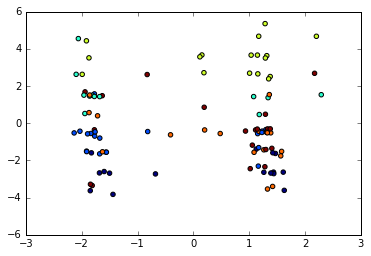

In [49]:
pca = PCA(2)

# Turn the dummified df into two columns with PCA
plot_columns = pca.fit_transform(df_dummy.iloc[:,:-1])

# Plot based on the two dimensions, and shade by cluster label
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=df_dummy["clusters"])
plt.show()


In [50]:
dfemail.head()

,Timestamp,Email Address,College Name?,Current Branch?,Current Year?,What is your Grade in College (GPA)?,How would you rate your puzzle solving efficiency?,Have you prepared for any olympiads/national level competitive examinations in your school days?,Have you actively participated in activities like chess or abacus etc?,"Have you been ""extensively"" involved in the following? [Competitive Coding]",...,How well do you think your GPA justifies the amount of efforts you put in?,"If you had an idea for a technical project, would you:","If you had an exam tomorrow, of a subject not of your interest, would you study hard to maintain a good score?",Are you proficient in the following? [Object Oriented Programming Concepts],Are you proficient in the following? [C/C++],Are you proficient in the following? [JAVA],Are you proficient in the following? [Python],Provide your preference for the following methods of learning [Books/Textual info on the Internet],Provide your preference for the following methods of learning [Online courses/videos],Provide your preference for the following methods of learning [Personalised classroom teaching (human)]
1,2/14/2019 13:39:07,abizerL123@gmail.com,Pune Institute of Computer Technology,Computer Engineering,Fourth Year,9.40,High,Not Participated,No,Yes,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,Yes,No,No,Prefer,Prefer,Prefer
2,2/14/2019 13:42:31,saurabhkshirsagar35@gmail.com,Pune Institute of Computer Technology,Computer Engineering,Fourth Year,9.37,Average,Participated and Prepared,No,No,...,is Apt or Overestimates my efforts,Start to learn and implement making the project,Yes,Yes,No,Yes,No,Do not prefer,Prefer,Prefer
3,2/14/2019 13:43:08,mahak.bansal97@gmail.com,Pune Institute of Computer Technology,Computer Engineering,Fourth Year,9.20,Average,Participated and Prepared,No,No,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,No,Yes,No,Prefer,Prefer,Prefer
4,2/14/2019 13:53:48,tjs.srivastava@gmail.com,Pune Institute of Computer Technology,Computer Engineering,Fourth Year,9.32,Average,Participated and Prepared,No,Yes,...,it Underestimates my efforts,Start to learn and implement making the project,Yes,Yes,Yes,No,Yes,Prefer,Prefer,Prefer
5,2/14/2019 13:55:50,shreyashnadal@gmail.com,Pune Institute of Computer Technology,Computer Engineering,Fourth Year,8.00,High,Not Participated,No,Yes,...,it Underestimates my efforts,Delay the project and postpone it to some othe...,No/Average performance,Yes,Yes,Yes,No,Prefer,Prefer,Do not prefer


In [51]:
dfemail.iloc[1]["Email Address"]

'saurabhkshirsagar35@gmail.com'

In [52]:
kmodes_labels = km.labels_
print (kmodes_labels)



arr=[]
for i in range(0,num_clusters):
    arr.append([])
for i in range(0, len(kmodes_labels)):
    arr[kmodes_labels[i]].append((dfemail.iloc[i])["Email Address"])
for i in range(0,num_clusters):
    print("Cluster ",i," :",arr[i])
    print()

[0 0 0 0 3 3 1 4 2 5 2 4 3 1 0 0 5 1 4 2 5 0 1 1 2 4 3 2 3 1 0 5 5 5 1 4 1
 1 1 3 5 1 0 2 2 0 5 5 2 5 2 3 2 0 2 5 5 4 5 3 4 1 1 3 1 3 5 0 4 1 1 3 3 1
 4 0 1 1 3 4 5 4 4 4 4 4 3 0 5 4 2 0 4 3 4 5 0 3 5 0 4 3 5]
Cluster  0  : ['abizerL123@gmail.com', 'saurabhkshirsagar35@gmail.com', 'mahak.bansal97@gmail.com', 'tjs.srivastava@gmail.com', 'aditisonar1997@gmail.com', 'pragatipatil2611@gmail.com', 'juhishelar@gmail.com', 'ayushgupta.gupta90@gmail.com', 'tanvideshpande81@gmail.com', 'chaitanyarahalkar4@gmail.com', 'snshreyanarkar7@gmail.com', 'sohamderd@gmail.com', 'patilmrunal2197@gmail.com', 'bsnsourav@gmail.com', 'rutwikkulkarni02@gmail.com', 'nidhi.dhar@hotmail.com', 'ojaswinig97@gmail.com']

Cluster  1  : ['madhurapawar10@gmail.com', 'borse.saurav8@gmail.com', 'harshitsinha73@gmail.com', 'nishawatpade@gmail.com', 'adupune@gmail.com', 'himanshupalve1999@gmail.com', 'sukhadj1998@gmail.com', 'aishwaryaharpale14@gmail.com', 'aditya.malte@gmail.com', 'prakashps26@gmail.com', 'prnvb15@gmail.c

In [53]:
kmodescent = km.cluster_centroids_
shape = kmodescent.shape
# For each cluster mode (a vector of "1" and "0")
# find and print the column headings where "1" appears.
# If no "1" appears, assign to "no-skills" cluster.
print (shape[0])
for i in range(shape[0]):
    if sum(kmodescent[i,:]) == 0:
        print("\ncluster " + str(i) + ": ")
        print("no-skills cluster")
    else:
        print("\ncluster " + str(i) + ": ")
        cent = kmodescent[i,:]
        for j in df_dummy.columns[np.nonzero(cent)]:
            print(j)

6

cluster 0: 
Binned GPA
Have you prepared for any olympiads/national level competitive examinations in your school days?
Have you been "extensively" involved in the following? [Sodtware Development]
Have you been "extensively" involved in the following? [ML/AI Projects or Research]
Have you been "extensively" involved in the following? [Mathematics and Logical Reasoning]
Have you been "extensively" involved in the following? [Social Activities (College Fest Organization or similar managerial or club activities)]
What are your plans after your undergraduation?
Are you attentive during lectures at college?
Do you feel the lectures are slow paced or repetitive in general?
What is your study pattern in general?
What would you prefer during exams to score good marks?
Do you seriously perform college practical assignments and projects?
Would you put off a task if the deadline is not near
If you don’t understand a particular topic in the curriculum what do you prefer?
Do you feel a need to 